
# Data Loading, Storage, and File Formats


* Topic Reading and Writing Data in Text Format  
Parsing functions in pandas  

* read_csv = load delimited data from a file, URL, or file-like   
object; use comma as default delimiter
* read_excel = Read tabular data from an Excel XLS or XLSX file
* read_html = Read all tables found in the given HTML document


# common options in these functions  


* Indexing  
Can treat one or more columns as the returned DataFrame, and whether to get
column names from the file, the user, or not at all.  
  
  
* Type inference and data conversion  
This includes the user-defined value conversions and custom list of missing value
markers.
  
  
* Datetime parsing  
Includes combining capability, including combining date and time information
spread over multiple columns into a single column in the result.  


* Iterating  
Support for iterating over chunks of very large files.  
  
  
* Unclean data issues  
Skipping rows or a footer, comments, or other minor things like numeric data with thousands separated by commas.


download examples folder from our provide link or book resources

# loading it into pandas data frame


In [1]:
import pandas as pd
sample_df= pd.read_csv("examples/sample.csv")
print(sample_df)

  studentid         name   chimestry   physics   english   math
0       A01     arif ali          20        30        40     50
1       A02  kamran khan          30        40        50     60
2       A03   imran ali           40        50        60     70
3       A04  kashif khan          50        60        70     80


In [2]:
#What if no column names available
#(we are removing first row)

sample_df= pd.read_csv("examples/sample.csv")
print(sample_df)

  studentid         name   chimestry   physics   english   math
0       A01     arif ali          20        30        40     50
1       A02  kamran khan          30        40        50     60
2       A03   imran ali           40        50        60     70
3       A04  kashif khan          50        60        70     80


In [3]:
# we can change the column names while loading data
sample_df=pd.read_csv("examples/sample.csv",skiprows=1,
                     names=['id', 'name', 'ch', 'ph', 'en', 'math'])
print(sample_df)

    id         name  ch  ph  en  math
0  A01     arif ali  20  30  40    50
1  A02  kamran khan  30  40  50    60
2  A03   imran ali   40  50  60    70
3  A04  kashif khan  50  60  70    80


In [4]:
# refer the book for other details like header=None  etc.

   a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo



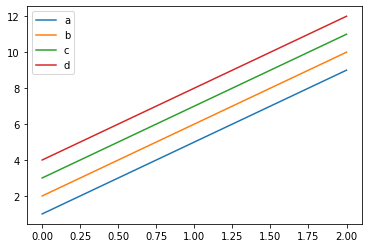

In [5]:
sample_df= pd.read_csv("examples/ex1.csv")
print(sample_df)
print()
sample_df.plot()

# Hierarchal Index

In [6]:
s2_df = pd.read_csv("examples/sample2.csv")
print(s2_df)

  key1 key2  value1  value2
0  one    a       1       2
1  one    b       3       4
2  one    c       5       6
3  one    d       7       8
4  two    a       9      10
5  two    b      11      12
6  two    c      13      14
7  two    d      15      16


In [7]:
# we have to specifiy which column will be used as index
parsed = pd.read_csv('examples/sample2.csv', index_col='key1')
parsed

,key2,value1,value2
key1,,,
one,a,1,2
one,b,3,4
one,c,5,6
one,d,7,8
two,a,9,10
two,b,11,12
two,c,13,14
two,d,15,16


In [8]:
pd.read_csv('examples/sample2.csv',index_col=['key1', 'key2'])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [9]:
# use of other delimiter are also possible
#In some cases, a table might not have a fixed delimiter, using whitespace or some
#other pattern to separate fields
#checkout [21] and [24]

# Handling Missing Values

In [10]:
result = pd.read_csv('examples/sample3.csv')
print(result)

  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo


In [11]:
result = pd.read_csv('examples/sample3.csv', na_values=['NULL'])#
print(result)

  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo


In [12]:
# changing data while loading in dataframe
#diconary=  column name : [source values, target value]#
sentinels = {'message': ['foo', 'NA']}
pd.read_csv('examples/sample3.csv', na_values=sentinels)

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,NaN


Handling missing values is an important and frequently nuanced part of the file parsing process. Missing data is usually either not present (empty string) or marked by
some sentinel value. By default, pandas uses a set of commonly occurring sentinels,
such as NA and NULL

# Reading and  Text Files in Pieces

In [13]:
#extracting selected rows from a large datasets
pd.read_csv('examples/train.csv')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [14]:
pd.read_csv('examples/train.csv', nrows=200)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1526,0,2.1,0,1,1,23,0.2,117,7,...,718,751,2227,18,10,3,1,1,0,2
196,1989,0,2.5,1,0,1,41,0.8,94,3,...,1100,1497,1665,17,9,12,1,1,1,2
197,1308,0,1.9,0,0,1,61,0.7,106,3,...,59,1215,3355,15,2,4,1,0,1,3
198,609,0,0.5,0,3,0,26,0.3,93,4,...,938,1948,1866,11,10,14,1,1,1,1


In [15]:
#To read a file in pieces, specify a chunksize as a number of rows:
chunks = pd.read_csv('examples/train.csv', chunksize=200)
print(type(chunks), print(chunks) )


<class 'pandas.io.parsers.TextFileReader'> None


In [16]:
chunkList = []
for chunk in chunks:
    chunkList.append(chunk)

df = chunkList[1] 
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
200,1703,1,0.5,0,0,1,22,0.6,192,1,...,286,1235,1046,5,4,13,1,0,1,0
201,1445,1,2.4,1,7,1,20,0.4,173,7,...,1273,1345,1441,7,4,13,1,1,1,1
202,1087,0,1.3,0,0,1,16,0.3,166,3,...,295,589,690,14,6,6,1,0,1,0
203,671,0,0.9,1,10,0,30,0.7,105,7,...,852,1182,2504,6,4,15,1,0,0,2
204,1472,1,2.3,0,6,0,61,0.1,168,6,...,710,1052,2677,19,15,8,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1896,0,0.5,1,8,1,7,0.4,141,2,...,447,794,3684,9,7,18,1,0,0,3
396,788,0,2.5,1,4,1,57,0.9,91,8,...,42,1161,3969,12,8,6,1,1,1,3
397,880,1,1.7,1,0,0,33,0.7,173,2,...,30,1350,1414,12,1,7,1,1,0,0
398,1323,1,2.5,1,10,1,28,0.2,131,4,...,162,619,1892,10,0,15,1,1,1,1


In [17]:
data = list(open('examples/ex3.txt'))
print(data)

['            A         B         C\n', 'aaa -0.264438 -1.026059 -0.619500\n', 'bbb  0.927272  0.302904 -0.032399\n', 'ccc -0.264273 -0.386314 -0.217601\n', 'ddd -0.871858 -0.348382  1.100491']


In [18]:
# use spaces (one or more ) as delimiter 
result = pd.read_table('examples/ex3.txt', sep='\s+')
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [19]:
df = pd.read_csv('examples/ex4.csv', skiprows=[0, 2, 3])
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [20]:
#Table 6-2. Some read_csv/read_table function arguments


# Writing Data to Text Format

In [21]:
data = pd.read_csv('examples/ex5.csv')
print(data)
data.to_csv('examples/out.csv')

  something  a   b     c   d message
0       one  1   2   3.0   4     NaN
1       two  5   6   NaN   8   world
2     three  9  10  11.0  12     foo


In [22]:
import numpy as np
dates = pd.date_range('1/1/2000', periods=7)
print(dates)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07'],
              dtype='datetime64[ns]', freq='D')


In [23]:
ts = pd.Series(np.arange(7), index=dates)
ts

2000-01-01    0
2000-01-02    1
2000-01-03    2
2000-01-04    3
2000-01-05    4
2000-01-06    5
2000-01-07    6
Freq: D, dtype: int32

In [24]:
ts.to_csv("examples/tseries.csv")

# JSON Data
short for JavaScript Object Notation

In [25]:
obj = """
{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
{"name": "Katie", "age": 38,
"pets": ["Sixes", "Stache", "Cisco"]}]
}
"""
print(obj)


{"name": "Wes",
"places_lived": ["United States", "Spain", "Germany"],
"pet": null,
"siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
{"name": "Katie", "age": 38,
"pets": ["Sixes", "Stache", "Cisco"]}]
}



In [26]:
# same like dictionary
data = pd.read_json('examples/example.json')
data

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


# XML and HTML: Web   data loading in to dataframe

In [27]:
# conda install lxml
# conda install -c anaconda beautifulsoup4 
# htconda install -c anaconda html5lib

In [28]:
import pandas as pd
tables = pd.read_html('examples/fdic_failed_bank_list.html')
# tables variable type is not dataframe, its list

In [29]:
print(type(tables))

<class 'list'>


In [30]:
print(len(tables))

1


In [31]:
failures_df = tables[0]
print(type(failures_df))

<class 'pandas.core.frame.DataFrame'>


In [32]:
print(failures_df.shape)

(547, 7)


In [33]:
# warning: data is bit lengthy in this data frame
print(failures_df.columns)

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')


In [34]:
len(failures_df)

547

In [35]:
print(failures_df["City"].head())

0           Mulberry
1           Woodbury
2    King of Prussia
3            Memphis
4          Milwaukee
Name: City, dtype: object


In [36]:
print(failures_df["Bank Name"].head())

0                     Allied Bank
1    The Woodbury Banking Company
2          First CornerStone Bank
3              Trust Company Bank
4      North Milwaukee State Bank
Name: Bank Name, dtype: object


In [37]:
print(failures_df.head())

                      Bank Name             City  ST   CERT  \
0                   Allied Bank         Mulberry  AR     91   
1  The Woodbury Banking Company         Woodbury  GA  11297   
2        First CornerStone Bank  King of Prussia  PA  35312   
3            Trust Company Bank          Memphis  TN   9956   
4    North Milwaukee State Bank        Milwaukee  WI  20364   

                 Acquiring Institution        Closing Date       Updated Date  
0                         Today's Bank  September 23, 2016  November 17, 2016  
1                          United Bank     August 19, 2016  November 17, 2016  
2  First-Citizens Bank & Trust Company         May 6, 2016  September 6, 2016  
3           The Bank of Fayette County      April 29, 2016  September 6, 2016  
4  First-Citizens Bank & Trust Company      March 11, 2016      June 16, 2016  


In [38]:
# for large and complicated dataframe, try to extract
# data as series for review and analysis
# here we converted a column into a new series of date type
close_timestamps = pd.to_datetime(failures_df['Closing Date'])
print(type(close_timestamps),close_timestamps)

<class 'pandas.core.series.Series'> 0     2016-09-23
1     2016-08-19
2     2016-05-06
3     2016-04-29
4     2016-03-11
         ...    
542   2001-07-27
543   2001-05-03
544   2001-02-02
545   2000-12-14
546   2000-10-13
Name: Closing Date, Length: 547, dtype: datetime64[ns]


In [39]:
# Binary Data Formats

In [40]:
frame = pd.read_csv('examples/ex1.csv')
frame.to_pickle('examples/frame_pickle')
pd.read_pickle('examples/frame_pickle')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [41]:
# Using HDF5 Format
import numpy as np
import pandas as pd
frame = pd.DataFrame({'a': np.random.randn(100)})
frame

,a
0,1.712488
1,-0.241768
2,0.037648
3,0.747299
4,-0.230081
...,...
95,0.420662
96,-0.214414
97,-1.187319
98,1.178867


In [42]:
store = pd.HDFStore('examples/mydata.h5')
store

<class 'pandas.io.pytables.HDFStore'>
File path: examples/mydata.h5

In [43]:
store['obj1'] = frame
store['obj1_col'] = frame['a']
print(store)

<class 'pandas.io.pytables.HDFStore'>
File path: examples/mydata.h5



In [44]:
x=store.obj1
print(type(x))
print(x.head())


<class 'pandas.core.frame.DataFrame'>
          a
0  1.712488
1 -0.241768
2  0.037648
3  0.747299
4 -0.230081


In [45]:
store.put('obj2', frame, format='table')
store.select('obj2', where=['index >= 10 and index <= 15'])
store.close()
frame.to_hdf('mydata.h5', 'obj3', format='table')
frame = pd.read_hdf('mydata.h5', 'obj3', where=['index < 5'])

In [46]:
frame

,a
0,1.712488
1,-0.241768
2,0.037648
3,0.747299
4,-0.230081


In [47]:
# Reading Microsoft Excel Files

In [48]:
#reading
import pandas as pd

xlsx = pd.ExcelFile('examples/ex1.xlsx')
pd.read_excel(xlsx, 'Sheet1')

,24-11221-0470303,A-1b(03)T,1
0,24-11221-1000502,A-1b(03)T,2
1,24-11221-1002500,B2b (12)T,3
2,24-11221-1002600,B2b (12)T,4
3,24-11221-1002602,B2b (12)T,5
4,24-11221-1002604,A-1b(03)T,6
5,24-11221-1002700,A-1b(03)T,7
6,24-11221-1002701,A-1b(03)T,8
7,24-11221-1003000,B2b (12)T,9
8,24-11221-1005102,A-1b(03)T,10
9,24-11221-1005104,A-2c(06)T,11


In [49]:
frame = pd.read_excel('examples/ex1.xlsx', 'Sheet1')
frame

,24-11221-0470303,A-1b(03)T,1
0,24-11221-1000502,A-1b(03)T,2
1,24-11221-1002500,B2b (12)T,3
2,24-11221-1002600,B2b (12)T,4
3,24-11221-1002602,B2b (12)T,5
4,24-11221-1002604,A-1b(03)T,6
5,24-11221-1002700,A-1b(03)T,7
6,24-11221-1002701,A-1b(03)T,8
7,24-11221-1003000,B2b (12)T,9
8,24-11221-1005102,A-1b(03)T,10
9,24-11221-1005104,A-2c(06)T,11


In [50]:
# writing
writer = pd.ExcelWriter('examples/ex2.xlsx')
frame.to_excel(writer, 'Sheet1')
writer.save()

In [51]:
# alternative option for single sheet
frame.to_excel('examples/ex3.xlsx')
frame

,24-11221-0470303,A-1b(03)T,1
0,24-11221-1000502,A-1b(03)T,2
1,24-11221-1002500,B2b (12)T,3
2,24-11221-1002600,B2b (12)T,4
3,24-11221-1002602,B2b (12)T,5
4,24-11221-1002604,A-1b(03)T,6
5,24-11221-1002700,A-1b(03)T,7
6,24-11221-1002701,A-1b(03)T,8
7,24-11221-1003000,B2b (12)T,9
8,24-11221-1005102,A-1b(03)T,10
9,24-11221-1005104,A-2c(06)T,11


In [52]:
# Interacting with Web APIs

In [53]:
import requests
import numpy as np
url = 'https://api.github.com/repos/pandas-dev/pandas/issues'
resp = requests.get(url)
resp

<Response [200]>

In [54]:
data = resp.json()
print(type(data))

<class 'list'>


In [55]:
print(data)

[{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/39862', 'repository_url': 'https://api.github.com/repos/pandas-dev/pandas', 'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/39862/labels{/name}', 'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/39862/comments', 'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/39862/events', 'html_url': 'https://github.com/pandas-dev/pandas/issues/39862', 'id': 810041253, 'node_id': 'MDU6SXNzdWU4MTAwNDEyNTM=', 'number': 39862, 'title': 'BUG: Docs website is blocked by google safe browsing', 'user': {'login': 'nylocx', 'id': 3329124, 'node_id': 'MDQ6VXNlcjMzMjkxMjQ=', 'avatar_url': 'https://avatars.githubusercontent.com/u/3329124?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/nylocx', 'html_url': 'https://github.com/nylocx', 'followers_url': 'https://api.github.com/users/nylocx/followers', 'following_url': 'https://api.github.com/users/nylocx/following{/other_user

In [56]:
data_dict = data[0]
data_dict

{'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/39862',
 'repository_url': 'https://api.github.com/repos/pandas-dev/pandas',
 'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/39862/labels{/name}',
 'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/39862/comments',
 'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/39862/events',
 'html_url': 'https://github.com/pandas-dev/pandas/issues/39862',
 'id': 810041253,
 'node_id': 'MDU6SXNzdWU4MTAwNDEyNTM=',
 'number': 39862,
 'title': 'BUG: Docs website is blocked by google safe browsing',
 'user': {'login': 'nylocx',
  'id': 3329124,
  'node_id': 'MDQ6VXNlcjMzMjkxMjQ=',
  'avatar_url': 'https://avatars.githubusercontent.com/u/3329124?v=4',
  'gravatar_id': '',
  'url': 'https://api.github.com/users/nylocx',
  'html_url': 'https://github.com/nylocx',
  'followers_url': 'https://api.github.com/users/nylocx/followers',
  'following_url': 'https://api.github.com/users/nyl

In [57]:
print(data_dict['title'])

BUG: Docs website is blocked by google safe browsing


In [58]:
print(data_dict.keys())

dict_keys(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url', 'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels', 'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments', 'created_at', 'updated_at', 'closed_at', 'author_association', 'active_lock_reason', 'body', 'performed_via_github_app'])


In [59]:
issues = pd.DataFrame(data, 
                    columns=['number', 'title','labels', 'state'])
issues

,number,title,labels,state
0,39862,BUG: Docs website is blocked by google safe br...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
1,39861,[POC] PERF: 1d version of the cython grouped a...,[],open
2,39860,BUG: read_json() converts non-existent fields ...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
3,39859,DOC: add button to edit on GitHub,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
4,39858,Update matplotlib canonical,"[{'id': 134699, 'node_id': 'MDU6TGFiZWwxMzQ2OT...",open
5,39857,BUG: read_csv() does not read all the lines in...,[],open
6,39856,CLN: assorted cleanups,[],open
7,39854,CI: 3.8 numpy_dev build failing recently,"[{'id': 48070600, 'node_id': 'MDU6TGFiZWw0ODA3...",open
8,39853,BUG: array ufuncs with more than 2 inputs fail...,"[{'id': 76811, 'node_id': 'MDU6TGFiZWw3NjgxMQ=...",open
9,39852,PERF: is_list_like,"[{'id': 8935311, 'node_id': 'MDU6TGFiZWw4OTM1M...",open


In [60]:
issues = pd.DataFrame(data)
issues

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,performed_via_github_app,pull_request
0,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/39862,810041253,MDU6SXNzdWU4MTAwNDEyNTM=,39862,BUG: Docs website is blocked by google safe br...,...,None,0,2021-02-17T10:10:15Z,2021-02-17T10:10:15Z,None,NONE,None,I hope it's ok to skip the template as this is...,None,NaN
1,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/39861,809996244,MDExOlB1bGxSZXF1ZXN0NTc0NzU5MjI0,39861,[POC] PERF: 1d version of the cython grouped a...,...,None,1,2021-02-17T09:10:05Z,2021-02-17T12:14:39Z,None,MEMBER,None,"For now, this is just a small example to open ...",None,{'url': 'https://api.github.com/repos/pandas-d...
2,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/39860,809985742,MDU6SXNzdWU4MDk5ODU3NDI=,39860,BUG: read_json() converts non-existent fields ...,...,None,1,2021-02-17T08:55:04Z,2021-02-17T08:59:52Z,None,NONE,None,- [x] I have checked that this issue has not a...,None,NaN
3,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/39859,809889961,MDU6SXNzdWU4MDk4ODk5NjE=,39859,DOC: add button to edit on GitHub,...,None,2,2021-02-17T06:13:54Z,2021-02-17T08:25:17Z,None,MEMBER,None,#### Location of the documentation\r\n\r\nhttp...,None,NaN
4,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/39858,809873299,MDExOlB1bGxSZXF1ZXN0NTc0NjU5MTk4,39858,Update matplotlib canonical,...,{'url': 'https://api.github.com/repos/pandas-d...,0,2021-02-17T05:41:48Z,2021-02-17T08:10:12Z,None,NONE,None,Please see https://discourse.matplotlib.org/t/...,None,{'url': 'https://api.github.com/repos/pandas-d...
5,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/39857,809862249,MDU6SXNzdWU4MDk4NjIyNDk=,39857,BUG: read_csv() does not read all the lines in...,...,None,0,2021-02-17T05:17:30Z,2021-02-17T05:18:37Z,None,NONE,None,"**Code Sample, a copy-pastable example if poss...",None,NaN
6,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/39856,809829080,MDExOlB1bGxSZXF1ZXN0NTc0NjIyNTY1,39856,CLN: assorted cleanups,...,None,0,2021-02-17T03:51:45Z,2021-02-17T12:13:23Z,None,MEMBER,None,- [ ] closes #xxxx\r\n- [ ] tests added / pass...,None,{'url': 'https://api.github.com/repos/pandas-d...
7,https://a

In [61]:
issues.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,performed_via_github_app,pull_request
0,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/39862,810041253,MDU6SXNzdWU4MTAwNDEyNTM=,39862,BUG: Docs website is blocked by google safe br...,...,None,0,2021-02-17T10:10:15Z,2021-02-17T10:10:15Z,None,NONE,None,I hope it's ok to skip the template as this is...,None,NaN
1,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/39861,809996244,MDExOlB1bGxSZXF1ZXN0NTc0NzU5MjI0,39861,[POC] PERF: 1d version of the cython grouped a...,...,None,1,2021-02-17T09:10:05Z,2021-02-17T12:14:39Z,None,MEMBER,None,"For now, this is just a small example to open ...",None,{'url': 'https://api.github.com/repos/pandas-d...
2,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/39860,809985742,MDU6SXNzdWU4MDk5ODU3NDI=,39860,BUG: read_json() converts non-existent fields ...,...,None,1,2021-02-17T08:55:04Z,2021-02-17T08:59:52Z,None,NONE,None,- [x] I have checked that this issue has not a...,None,NaN
3,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/issues/39859,809889961,MDU6SXNzdWU4MDk4ODk5NjE=,39859,DOC: add button to edit on GitHub,...,None,2,2021-02-17T06:13:54Z,2021-02-17T08:25:17Z,None,MEMBER,None,#### Location of the documentation\r\n\r\nhttp...,None,NaN
4,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://api.github.com/repos/pandas-dev/pandas...,https://github.com/pandas-dev/pandas/pull/39858,809873299,MDExOlB1bGxSZXF1ZXN0NTc0NjU5MTk4,39858,Update matplotlib canonical,...,{'url': 'https://api.github.com/repos/pandas-d...,0,2021-02-17T05:41:48Z,2021-02-17T08:10:12Z,None,NONE,None,Please see https://discourse.matplotlib.org/t/...,None,{'url': 'https://api.github.com/repos/pandas-d...


In [62]:
print(issues[['number', 'title']].head())

   number                                              title
0   39862  BUG: Docs website is blocked by google safe br...
1   39861  [POC] PERF: 1d version of the cython grouped a...
2   39860  BUG: read_json() converts non-existent fields ...
3   39859                  DOC: add button to edit on GitHub
4   39858                        Update matplotlib canonical


In [63]:
#Interacting with Databases


In [64]:
#conda install -c anaconda sqlite 


import sqlite3

#creating table
query = """ CREATE TABLE test(a VARCHAR(20), 
        b VARCHAR(20),c REAL,
        d INTEGER);  """
# creating database file
con = sqlite3.connect('examples/mydata.sqlite')
#running query
con.execute(query)
# table created
con.commit()
# done

OperationalError: table test already exists

In [ ]:
# inserting data
#preparing data
data = [('Atlanta', 'Georgia', 1.25, 6),
        ('Tallahassee', 'Florida', 2.6, 3),
        ('Sacramento', 'California', 1.7, 5)
       ]
# preparing insert statement
stmt = "INSERT INTO test VALUES(?, ?, ?, ?)"
# running insert statement
con.executemany(stmt, data)
#finalizing data saving
con.commit()

In [65]:
#selecting/extracting data
cursor = con.execute('select * from test')
rows = cursor.fetchall()
print(type(rows), rows)

<class 'list'> [('Atlanta', 'Georgia', 1.25, 6), ('Tallahassee', 'Florida', 2.6, 3), ('Sacramento', 'California', 1.7, 5)]


In [66]:
print(cursor.description)

(('a', None, None, None, None, None, None), ('b', None, None, None, None, None, None), ('c', None, None, None, None, None, None), ('d', None, None, None, None, None, None))


In [67]:
data_df = pd.DataFrame(rows, columns=[x[0] for x in cursor.description])
data_df

,a,b,c,d
0,Atlanta,Georgia,1.25,6
1,Tallahassee,Florida,2.60,3
2,Sacramento,California,1.70,5


In [69]:
#conda install -c anaconda sqlalchemy 
# using sqlalchemy 
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///mydata.sqlite')
data_df =pd.read_sql('select * from test', db)
data_df

OperationalError: (sqlite3.OperationalError) no such table: test
[SQL: select * from test]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [ ]:
#end of six chapter
